In [1]:
import torch
from ptolemy.images import load_mrc, Exposure
import ptolemy.algorithms as algorithms
import ptolemy.models as models

In [2]:
torch.__version__

'1.10.2+cu102'

In [3]:
ex = load_mrc('example_images/med_mag/21feb25a_23139789.mrc')

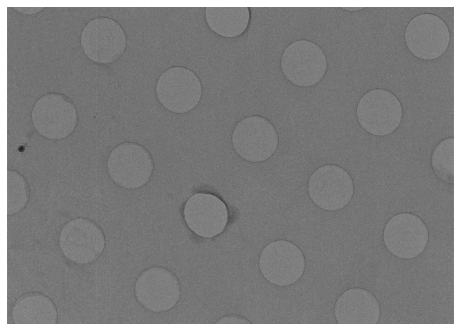

In [4]:
ex = Exposure(ex)
ex.viz_image()

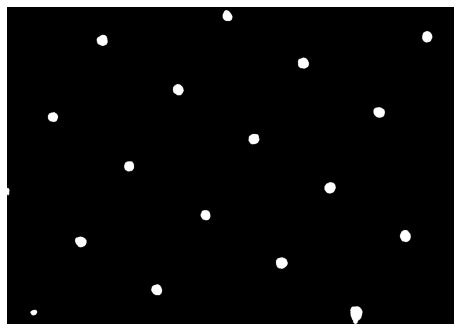

In [5]:
segmenter = algorithms.UNet_Segmenter(64, 9, model_path='weights/211026_unet_9x64_ep6.torchmodel')
ex.make_mask(segmenter)
ex.viz_mask()

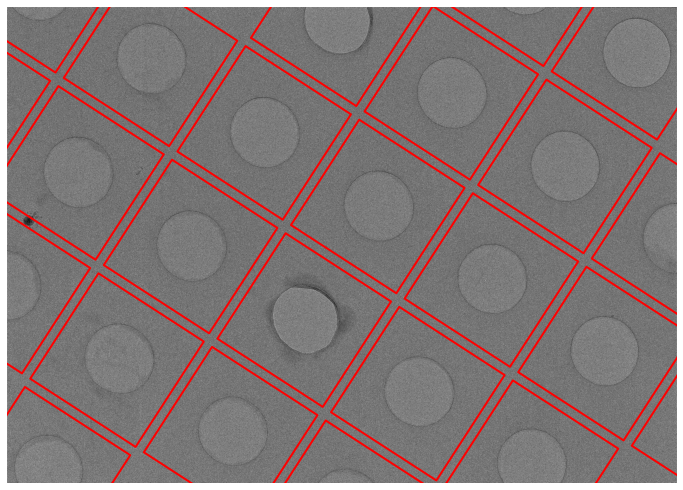

In [6]:
processor = algorithms.MedMag_Process_Mask(edge_tolerance=100)
ex.process_mask(processor)
ex.viz_boxes()

In [8]:
cropper = algorithms.MedMag_Process_Crops()
ex.get_crops(cropper)
model = models.AveragePoolModel(4, 128)
model.load_state_dict(torch.load('weights/211214_medmag_128x4_avgpool_e5.torchmodel'))
wrapper = models.Wrapper(model)
ex.score_crops(wrapper, final=False)

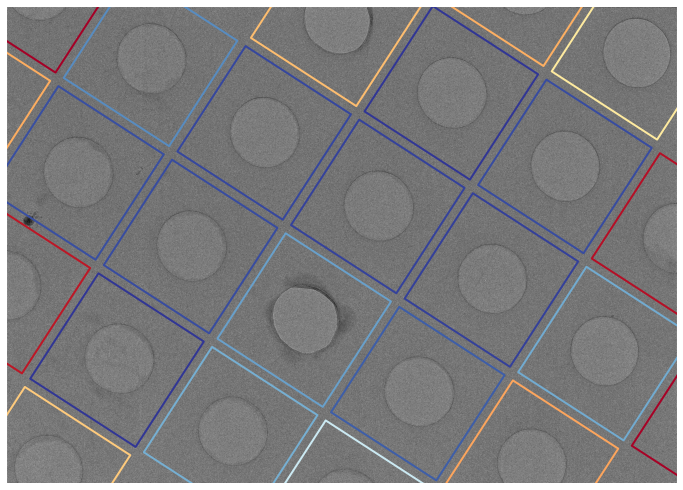

In [9]:
ex.viz_boxes_and_scores()

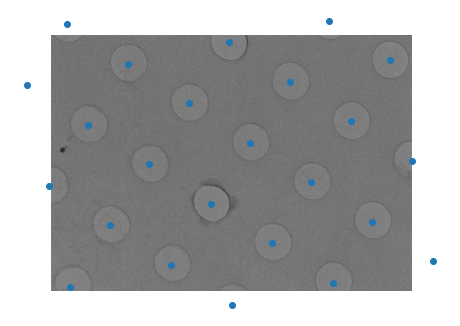

In [11]:
ex.viz_image_centers()